### 위키백과 크롤링

In [3]:
import urllib.request
from bs4 import BeautifulSoup
import requests

pages = []

url = "https://en.wikipedia.org/wiki/Network_science"
req = urllib.request.Request(url)
sourcecode = urllib.request.urlopen(url).read()
soup = BeautifulSoup(sourcecode, "html.parser")

for href in soup.find("div", class_ ="div-col").find_all("li"):
    pages.append("https://en.wikipedia.org"+href.find("a")["href"])

print(pages)

['https://en.wikipedia.org/wiki/Cascading_failure', 'https://en.wikipedia.org/wiki/Climate_as_complex_networks', 'https://en.wikipedia.org/wiki/Collaborative_innovation_network', 'https://en.wikipedia.org/wiki/Communicative_ecology', 'https://en.wikipedia.org/wiki/Complex_network', 'https://en.wikipedia.org/wiki/Core-periphery_structure', 'https://en.wikipedia.org/wiki/Dual-phase_evolution', 'https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model', 'https://en.wikipedia.org/wiki/Glossary_of_graph_theory', 'https://en.wikipedia.org/wiki/Gradient_network', 'https://en.wikipedia.org/wiki/Higher_category_theory', 'https://en.wikipedia.org/wiki/Immune_network_theory', 'https://en.wikipedia.org/wiki/Irregular_warfare', 'https://en.wikipedia.org/wiki/Interdependent_networks', 'https://en.wikipedia.org/wiki/Network_management', 'https://en.wikipedia.org/wiki/Network_dynamics', 'https://en.wikipedia.org/wiki/Network_formation', 'https://en.wikipedia.org/wiki/Network_theory_in_risk_as

In [4]:
def get_html(url):
    html = ""
    resp = requests.get(url)
    
    if resp.status_code == 200:
        html = resp.text
    return html

In [5]:
import re

def crawl_div_col(html):
    
    soup = BeautifulSoup(html)
    
    li_list = soup.select("div.div-col > ul > li > a")
    text = re.sub('<.+?>', '', str(li_list), 0).strip()
    
    return text

In [6]:
def crawl_mw_parser_output(html):
    
    soup = BeautifulSoup(html)
    
    li_list = soup.select("div.mw-parser-output > ul > li > a")
    text = re.sub('<.+?>', '', str(li_list), 0).strip()
    
    return text

In [7]:
div_col = []

for i in range(0, len(pages)-1):
    html = get_html(pages[i])
    div_col.append(crawl_div_col(html))

In [8]:
print(div_col) # div.div-col에 해당되는 데이터만 가져와진다.

['[Blackouts, Brittle system, Butterfly effect, Byzantine failure, Cascading rollback, Chain reaction, Chaos theory, Cache stampede, Congestion collapse, Domino effect, For Want of a Nail (proverb), Network science, Network theory, Interdependent networks, Kessler Syndrome, Percolation theory, Progressive collapse, Virtuous circle and vicious circle, Wicked problem]', '[]', '[]', '[]', '[Community structure, Complex adaptive system, Complex systems, Dual-phase evolution, Dynamic network analysis, Interdependent networks, Network theory, Network science, Percolation theory, Random graph, Random graph theory of gelation, Scale-free networks, Small world networks, Spatial network, Trophic coherence]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[Civilian casualty ratio, Endemic warfare, Fourth-generation warfare, Hague Conventions (1899 and 1907), Information warfare, Irregular military, Low-intensity conflict, Political warfare, Psychological operations, The Troubles, War on Terror, War o

In [9]:
mw_parser_output = []

for i in range(0, len(pages)-1):
    html = get_html(pages[i])
    mw_parser_output.append(crawl_mw_parser_output(html))

In [10]:
mw_parser_output

['[Blackout in Northeast America in 1965, Blackout in Southern Brazil in 1999, Blackout in Northeast America in 2003, Blackout in Italy in 2003, Blackout in London in 2003, European Blackout in 2006, Blackout in Northern India in 2012, Blackout in South Australia in 2016, Blackout in southeast South America in 2019, Space Weather: Blackout — Massive Power Grid Failure, Cascading failure demo applet, Cascade-based attacks on complex networks,, Model for cascading failures in complex networks,, Protection Strategies for Cascading Grid Failures — A Shortcut Approach, preprint, Nova: Crash of Flight 111, Swissair Flight 111, Accident grounds neutrino lab, The Structure and Dynamics of Large Scale Organizational Networks (Dan Braha, New England Complex Systems Institute), From Single Network to Network of Networks]',
 '[Community structure, Network theory, Network science, Teleconnection, Climatology]',
 '[Collective intelligence, Polytely, Swarm intelligence, Open politics, Symbolic intera

### 에고 노드의 이웃

In [11]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("https://en.wikipedia.org/wiki/Network_science")
bsobject = BeautifulSoup(html, "html.parser") # html 정보 가져오기

In [12]:
li_code = bsobject.select('div.div-col>ul>li')

ulli_total = []

for c in range(0,len(li_code)-1):
    ulli_total.append(li_code[c].get_text())

print(ulli_total)

['Cascading failure', 'Climate as complex networks', 'Collaborative innovation network', 'Communicative ecology', 'Complex network', 'Core-periphery structures in networks', 'Dual-phase evolution', 'Erdős–Rényi model', 'Glossary of graph theory', 'Gradient network', 'Higher category theory', 'Immune network theory', 'Irregular warfare', 'Interdependent networks', 'Network analyzer', 'Network dynamics', 'Network formation', 'Network theory in risk assessment', 'Network topology', 'Networks in labor economics', 'Non-linear preferential attachment', 'Percolation', 'Percolation theory', 'Policy network analysis', 'Polytely', 'Quantum complex network', 'Random networks', 'Rumor spread in social network', 'Scale-free networks', 'Sequential dynamical system', 'Service network', 'Small-world networks', 'Structural cut-off']


### 결합

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.DataFrame(ulli_total, columns = ['neighbor'])
df.insert(0,'core',np.nan)
df = df.fillna('Network Science')
df

,core,neighbor
0,Network Science,Cascading failure
1,Network Science,Climate as complex networks
2,Network Science,Collaborative innovation network
3,Network Science,Communicative ecology
4,Network Science,Complex network
5,Network Science,Core-periphery structures in networks
6,Network Science,Dual-phase evolution
7,Network Science,Erdős–Rényi model
8,Network Science,Glossary of graph theory
9,Network Science,Gradient network


In [32]:
df.groupby(['core'], as_index=False).agg(lambda x: ','.join(set(x)))

,core,neighbor
0,Network Science,"Cascading failure,Communicative ecology,Polyte..."


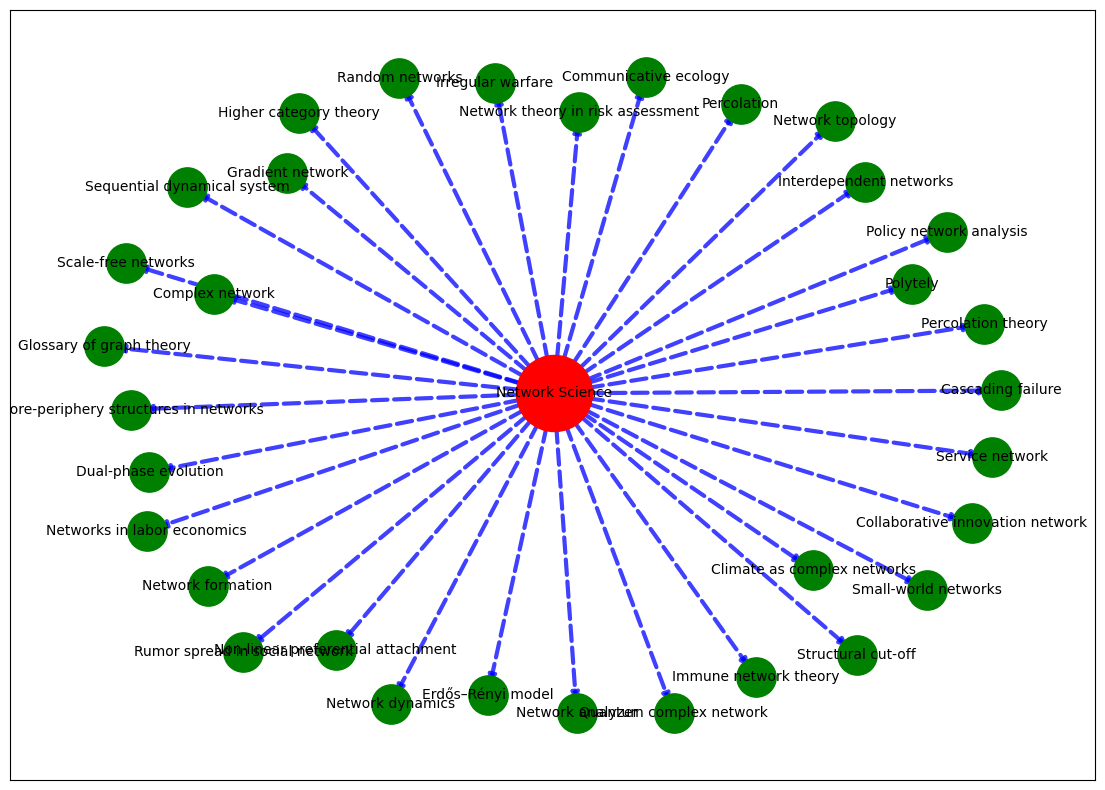

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize = (14,10))

# Network Science의 그래프
g = nx.from_pandas_edgelist(df,'core','neighbor', create_using=nx.DiGraph())

ego = 'Network Science'

pos = nx.spring_layout(g)

ego_options = {"node_size":3000, "node_color":"r"}
options = {"node_size" : 800, "node_color" : "g" }

nx.draw_networkx_nodes(g, pos, nodelist=[ego],**ego_options) # ego 노드 크기와 색상 별도 설정
nx.draw_networkx_nodes(g, pos, nodelist=list(g.nodes())[1:len(g.nodes())],**options) 

nx.draw_networkx_labels(g, pos, font_size = 10)

nx.draw_networkx_edges(g, pos,  width = 3,
                       style = "dashed", alpha = 0.75, edge_color="b")

self = list(nx.selfloop_edges(g))
g.remove_edges_from(self)

plt.show()

### 이웃의 이웃

In [112]:
b = []

for i in range(0, len(ulli_total)-1):
    a = list(div_col[i].split(','))
    for j in range(len(a)):
        b.append(ulli_total[i])
    b.extend(a)  
    neigh_df = pd.DataFrame([b[0:int(len(b)/2)],b[int(len(b)/2):]])
    neigh_df = neigh_df.transpose()
    neigh_df.columns = ['neighbor','neighbors']
total_df = pd.merge(df, neigh_df, on = 'neighbor', how = 'inner')
total_df['neighbors']= total_df['neighbors'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)

display(total_df)

,core,neighbor,neighbors
0,Network Science,Cascading failure,Dynamic Bayesian network
1,Network Science,Cascading failure,Dynamic network analysis
2,Network Science,Cascading failure,Dynamic single frequency networks
3,Network Science,Cascading failure,Gaussian network model
4,Network Science,Cascading failure,Gene regulatory network
...,...,...,...
80,Network Science,Network dynamics,Scale free networks
81,Network Science,Network dynamics,
82,Network Science,Network dynamics,Sequential dynamical system
83,Network Science,Network dynamics,


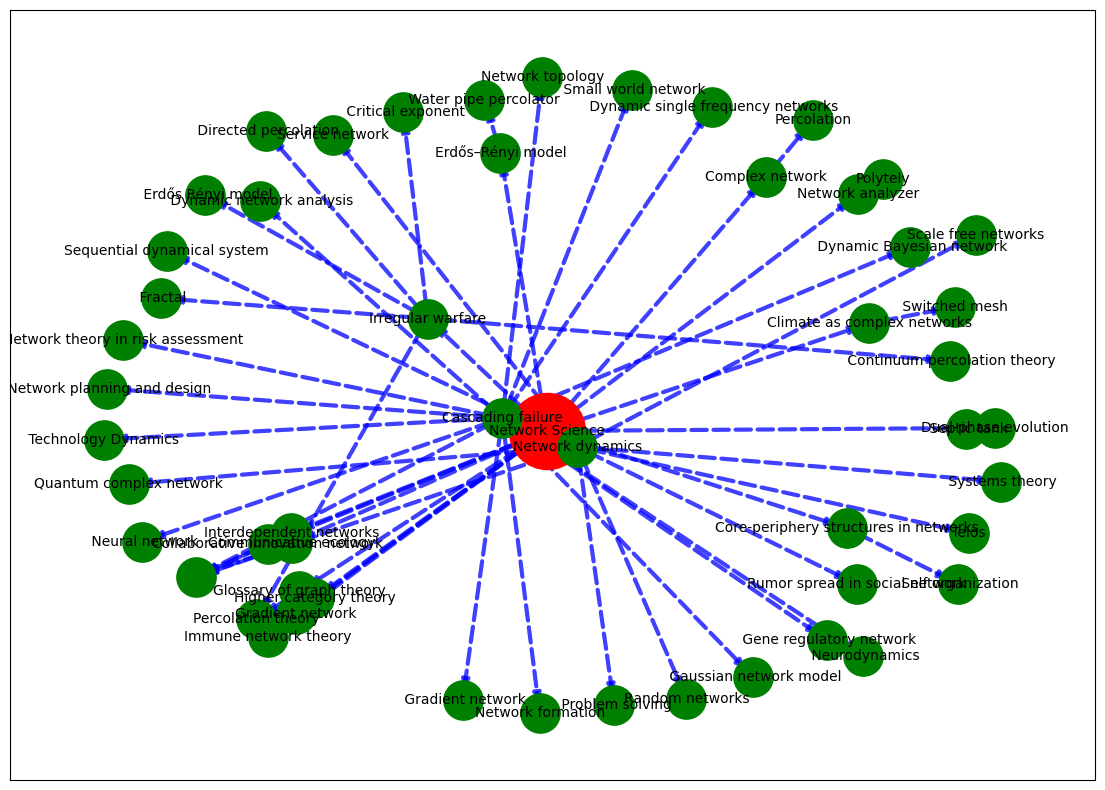

In [117]:
# Network Science의 그래프
g = nx.from_pandas_edgelist(total_df,'core','neighbor', create_using=nx.DiGraph())

# Network Science 이웃의 그래프
h = nx.from_pandas_edgelist(total_df,'neighbor','neighbors', create_using=nx.DiGraph())

# 결합
u = nx.compose(g,h) 

ego = 'Network Science'
pos = nx.spring_layout(u)

ego_options = {"node_size":3000, "node_color":"r"}
options = {"node_size" : 800, "node_color" : "g" }

nx.draw_networkx_nodes(u, pos, nodelist=[ego],**ego_options) # ego 노드 크기와 색상 별도 설정
nx.draw_networkx_nodes(u, pos, nodelist=list(u.nodes())[1:len(u.nodes())],**options) 

nx.draw_networkx_labels(u, pos, font_size = 10)

nx.draw_networkx_edges(u, pos,  width = 3,
                       style = "dashed", alpha = 0.75, edge_color="b")

plt.show()